# Sampling from a Gaussian Prior

In [95]:
import numpy as np
import matplotlib.pyplot as plt


Given some data samples $x_i \in \mathcal{X}$


In [96]:
# Prior data samples
n = 100
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

To define a Gaussian Process, we should first define a Kernel function. Let us use the one that we just learned - the Squared Exponential Kernel

$$ k_{SE}(x, x') = exp\left( -\frac{1}{2\tau^2}\mid\mid x - x' \mid\mid^2\right) $$

In [97]:
# Define the squared exponential kernel function
def se_kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

# Define the laplace kernel function
def laplace_kernel(a, b, param):
    dist = np.sqrt(np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T))
    return np.exp(-(1/param) * dist)


The other things required to define a Gaussian Process are the mean and the convariance matrix

In [98]:
# Generate the covariance matrix corresponding to these data samples
param = 0.1
mean = 0

K_ss = se_kernel(Xtest, Xtest, param)
# K_ss = laplace_kernel(Xtest, Xtest, param)

Now that we have defined our Gaussian Process, we need to sample from this distribution defined by the mean and covariance matrix. There are many strategies to sample from a probability distribution. We will use the Inverse Cumulative Sampling.

Let our random variable be $f_i \sim \mathcal{N}(\mu, \sigma^2)$,

this method tells us the random samples are given by the equation, 
$$ f_i \sim \mu + \sigma \mathcal{N}(0, 1)$$

For us, we are trying to sample $f \sim \mathcal{N}\left( \begin{bmatrix} m(x_1) \\ \vdots \\ m(x_m) \end{bmatrix}, \begin{bmatrix} k(x_1, x_1) & \cdots & k(x_1, x_m) \\ \vdots & \ddots & \vdots \\ k(x_m, x_1) & \cdots & k(x_m, x_m)\end{bmatrix} \right)$

$\therefore$ to use the Inverse Cumulative Sampling, we need to calculate $\sqrt{K_{ss}}$

This is done by using the Cholesky Decomposition of the matrix: $K = LL^T$

Then we can say that $f = \mu + L \mathcal{N}(0, 1)$


In [99]:
# One last thing to calculate before defining the Gaussian Process: square root of the variance of the data samples
# to calculate the square root of a matrix, we use Cholesky Decomposition
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n))

In [100]:
# Now that we know the mean and variance, we have defined our GP
# Let us sample from this distribution
f_prior = mean + np.dot(L, np.random.normal(size=(n,3)))
f_prior.shape

(100, 3)

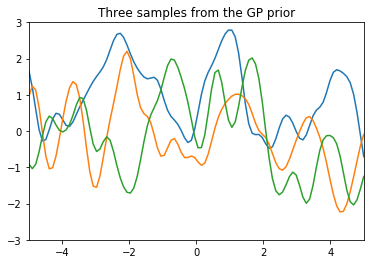

In [101]:
# Let's plot the priors
plt.plot(Xtest, f_prior)
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP prior')
plt.show()